# Cell Adhesion Assay - Data Analysis

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

Load a <code>pandas.DataFrame</code> from a <code>.csv</code> file. Then <code>display</code> a small sample of the <code>pandas.DataFrame</code> with the <code>head()</code> and <code>tile()</code> methods. The default number of elements to display is 5. However, it is posible to pass a custom number.

In [2]:
data=pd.read_csv('../Data/ResultsTable_Project.csv')
display(data.head(3))
display(data.tail(3))

,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,Good,A,1,1,1.1009,0.0,0.5021,0.8354,2,0.1199,16.6777
1,2,Good,A,1,2,0.7686,0.0,0.5493,0.7794,2,0.1119,17.8767
2,3,Good,A,1,3,0.7961,0.0,0.6169,0.8494,6,0.1219,49.2098


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
21,22,Blur,B,4,1,3.0666,0.0,0.04762,0.010740,1,0.001542,648.4877
22,23,Blur,B,4,2,3.0678,0.0,0.01471,0.002991,1,0.000429,2329.2620
23,24,Blur,B,4,3,3.2268,0.0,0.06250,0.031130,1,0.004468,223.7918


Overview of data

In [3]:
# overview of the numerical data
display(data.describe())

,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,2.50000,2.000000,1.818338,0.272879,0.609059,0.463974,3.750000,0.066610,246.302688
std,7.071068,1.14208,0.834058,1.197747,0.545870,0.373091,0.373651,3.650491,0.053644,510.074972
min,1.000000,1.00000,1.000000,0.383000,0.000000,0.014710,0.002991,1.000000,0.000429,7.570100
25%,6.750000,1.75000,1.000000,0.739325,0.000000,0.362955,0.097830,1.000000,0.014043,45.559100
50%,12.500000,2.50000,2.000000,1.424450,0.000000,0.693700,0.553400,2.000000,0.079445,85.107050
75%,18.250000,3.25000,3.000000,3.066900,0.053400,0.934825,0.832625,6.000000,0.119525,167.079725
max,24.000000,4.00000,3.000000,3.561200,1.782200,1.000000,0.920200,12.000000,0.132100,2329.262000


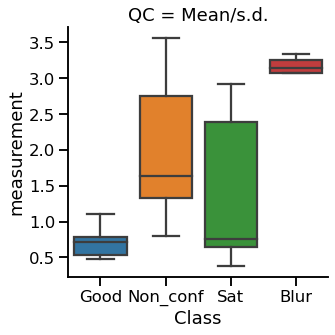

In [12]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['Mean/s.d.'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_blurring.png')

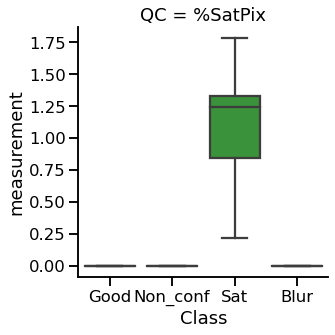

In [13]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['%SatPix'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_saturation.png')

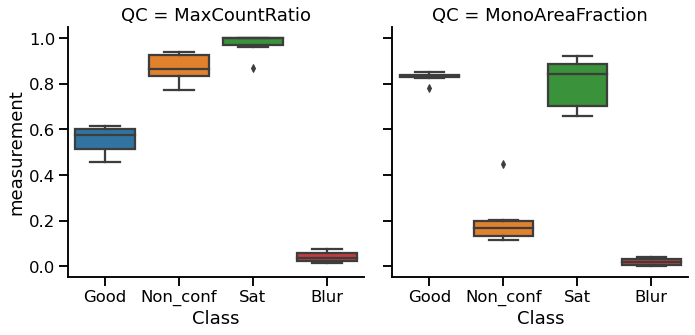

In [14]:
# 'Melt' the data
dataMelted = data.melt(id_vars='Class',
                       value_vars=['MaxCountRatio','MonoAreaFraction'],
                       var_name='QC',
                       value_name='measurement')

# Plot the melted data
with sns.plotting_context('talk'):
    sns.catplot(x='Class',
                y='measurement',
                col='QC',
                data=dataMelted,
                kind="box",
                height=5,
                aspect=1);

# Save the plot
plt.savefig('myBoxplot_maxRatio_monolayer.png')

In [7]:
# create a mask for each class
maskGood = data.loc[:,'Class']=='Good'
mask_non_conf = data.loc[:,'Class']=='Non_conf'
maskSat = data.loc[:,'Class']=='Sat'
maskBlur = data.loc[:,'Class']=='Blur'
display(data.loc[maskGood])
display(data.loc[mask_non_conf])
display(data.loc[maskSat])
display(data.loc[maskBlur])

,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,Good,A,1,1,1.1009,0.0,0.5021,0.8354,2,0.1199,16.6777
1,2,Good,A,1,2,0.7686,0.0,0.5493,0.7794,2,0.1119,17.8767
2,3,Good,A,1,3,0.7961,0.0,0.6169,0.8494,6,0.1219,49.2098
12,13,Good,B,1,1,0.4927,0.0,0.4583,0.8317,11,0.1194,92.1312
13,14,Good,B,1,2,0.4790,0.0,0.6017,0.8267,6,0.1187,50.5614
14,15,Good,B,1,3,0.6515,0.0,0.6017,0.8412,6,0.1208,49.6846


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
3,4,Non_conf,A,2,1,1.6161,0.0,0.9333,0.1382,2,0.01984,100.8249
4,5,Non_conf,A,2,2,3.1285,0.0,0.7705,0.2013,1,0.02890,34.6070
5,6,Non_conf,A,2,3,1.6416,0.0,0.9394,0.1301,2,0.01867,107.1176
15,16,Non_conf,B,2,1,1.2328,0.0,0.9000,0.1944,5,0.02791,179.1740
16,17,Non_conf,B,2,2,3.5612,0.0,0.8333,0.1162,1,0.01668,59.9442
17,18,Non_conf,B,2,3,0.7977,0.0,0.8333,0.4473,4,0.06421,62.2916


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
6,7,Sat,A,3,1,0.6479,1.3367,1.0000,0.8922,10,0.12810,78.0829
7,8,Sat,A,3,2,2.9049,1.7822,1.0000,0.8093,1,0.11620,8.6074
8,9,Sat,A,3,3,0.3830,1.1719,0.9604,0.9202,1,0.13210,7.5701
18,19,Sat,B,3,1,2.9139,0.7324,1.0000,0.8719,2,0.12520,15.9784
19,20,Sat,B,3,2,0.8542,0.2136,0.8684,0.6658,10,0.09558,104.6236
20,21,Sat,B,3,3,0.6359,1.3123,1.0000,0.6595,12,0.09468,126.7450


,n,Class,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
9,10,Blur,A,4,1,3.2652,0.0,0.07692,0.031620,1,0.004539,220.3356
10,11,Blur,A,4,2,3.3407,0.0,0.02381,0.005981,1,0.000859,1164.6310
11,12,Blur,A,4,3,3.0665,0.0,0.02326,0.042720,1,0.006133,163.0483
21,22,Blur,B,4,1,3.0666,0.0,0.04762,0.010740,1,0.001542,648.4877
22,23,Blur,B,4,2,3.0678,0.0,0.01471,0.002991,1,0.000429,2329.2620
23,24,Blur,B,4,3,3.2268,0.0,0.06250,0.031130,1,0.004468,223.7918


In [8]:
display(data.loc[maskGood].describe())
display(data.loc[mask_non_conf].describe())
display(data.loc[maskSat].describe())
display(data.loc[maskBlur].describe())

,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,8.00000,1.0,2.000000,0.714800,0.0,0.555000,0.827300,5.500000,0.118767,46.023567
std,6.63325,0.0,0.894427,0.231307,0.0,0.063836,0.024744,3.331666,0.003544,27.653163
min,1.00000,1.0,1.000000,0.479000,0.0,0.458300,0.779400,2.000000,0.111900,16.677700
25%,2.25000,1.0,1.250000,0.532400,0.0,0.513900,0.827950,3.000000,0.118875,25.709975
50%,8.00000,1.0,2.000000,0.710050,0.0,0.575500,0.833550,6.000000,0.119650,49.447200
75%,13.75000,1.0,2.750000,0.789225,0.0,0.601700,0.839750,6.000000,0.120575,50.342200
max,15.00000,1.0,3.000000,1.100900,0.0,0.616900,0.849400,11.000000,0.121900,92.131200


,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.00000,2.0,2.000000,1.996317,0.0,0.868300,0.204583,2.500000,0.029368,90.659883
std,6.63325,0.0,0.894427,1.097336,0.0,0.066783,0.123929,1.643168,0.017791,51.184121
min,4.00000,2.0,1.000000,0.797700,0.0,0.770500,0.116200,1.000000,0.016680,34.607000
25%,5.25000,2.0,1.250000,1.328625,0.0,0.833300,0.132125,1.250000,0.018963,60.531050
50%,11.00000,2.0,2.000000,1.628850,0.0,0.866650,0.166300,2.000000,0.023875,81.558250
75%,16.75000,2.0,2.750000,2.756775,0.0,0.924975,0.199575,3.500000,0.028653,105.544425
max,18.00000,2.0,3.000000,3.561200,0.0,0.939400,0.447300,5.000000,0.064210,179.174000


,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,14.00000,3.0,2.000000,1.389967,1.091517,0.971467,0.803150,6.000000,0.115310,56.934567
std,6.63325,0.0,0.894427,1.186398,0.546272,0.052918,0.114800,5.176872,0.016486,52.999558
min,7.00000,3.0,1.000000,0.383000,0.213600,0.868400,0.659500,1.000000,0.094680,7.570100
25%,8.25000,3.0,1.250000,0.638900,0.842275,0.970300,0.701675,1.250000,0.100735,10.450150
50%,14.00000,3.0,2.000000,0.751050,1.242100,1.000000,0.840600,6.000000,0.120700,47.030650
75%,19.75000,3.0,2.750000,2.392225,1.330600,1.000000,0.887125,10.000000,0.127375,97.988425
max,21.00000,3.0,3.000000,2.913900,1.782200,1.000000,0.920200,12.000000,0.132100,126.745000


,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.0,6.000000,6.000000
mean,17.00000,4.0,2.000000,3.172267,0.0,0.041470,0.020864,1.0,0.002995,791.592733
std,6.63325,0.0,0.894427,0.121034,0.0,0.024885,0.016384,0.0,0.002352,844.732394
min,10.00000,4.0,1.000000,3.066500,0.0,0.014710,0.002991,1.0,0.000429,163.048300
25%,11.25000,4.0,1.250000,3.066900,0.0,0.023397,0.007171,1.0,0.001029,221.199650
50%,17.00000,4.0,2.000000,3.147300,0.0,0.035715,0.020935,1.0,0.003005,436.139750
75%,22.75000,4.0,2.750000,3.255600,0.0,0.058780,0.031497,1.0,0.004521,1035.595175
max,24.00000,4.0,3.000000,3.340700,0.0,0.076920,0.042720,1.0,0.006133,2329.262000
